In [1]:
!pip install mne

  Obtaining dependency information for mne from https://files.pythonhosted.org/packages/79/34/06151e860d86273afd7b2f2fef560783b4afc9e2601b333f008869fb606c/mne-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for pooch>=1.5 from https://files.pythonhosted.org/packages/f4/72/8ae0f1ba4ce6a4f6d4d01a60a9fdf690fde188c45c1872b0b4ddb0607ace/pooch-1.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for lazy-loader>=0.3 from https://files.pythonhosted.org/packages/83/60/d497a310bde3f01cb805196ac61b7ad6dc5dcf8dce66634dc34364b20b4f/lazy_loader-0.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/8.3 MB 17.4 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.3 MB 16.4 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.3 MB 12.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.3 MB 12.1 MB/s eta 0:00:01
   ------------ ------

Extracting EDF parameters from C:\Users\bu23957\Downloads\102_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12316999  =      0.000 ... 24633.998 secs...


C:\Users\bu23957\AppData\Local\Temp\ipykernel_5632\2121609029.py:5: RuntimeWarning: Omitted 16 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(eeg_file_path, preload=True)
C:\Users\bu23957\AppData\Local\Temp\ipykernel_5632\2121609029.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_edf(eeg_file_path, preload=True)


Using matplotlib as 2D backend.


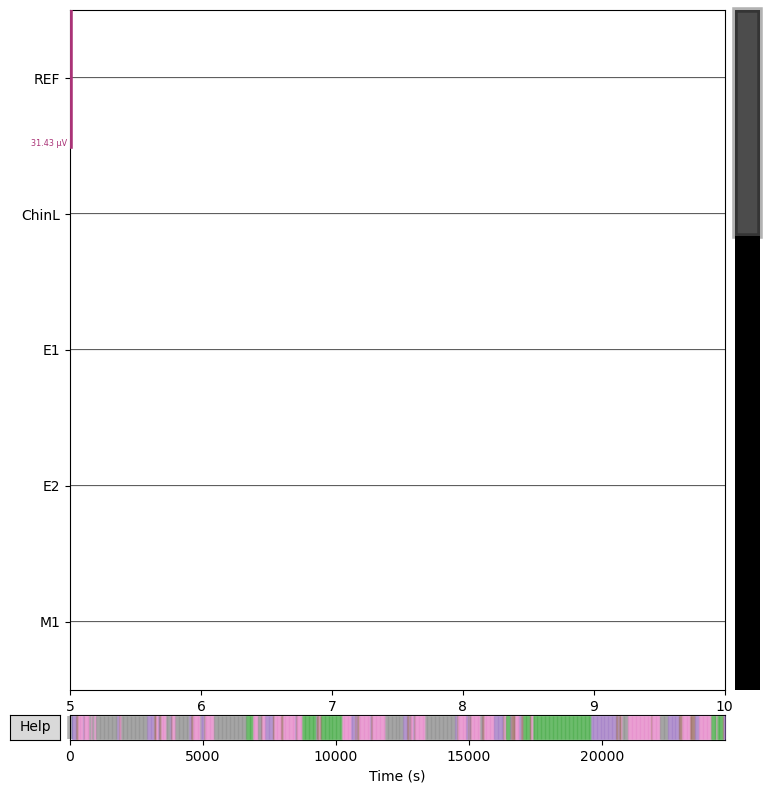

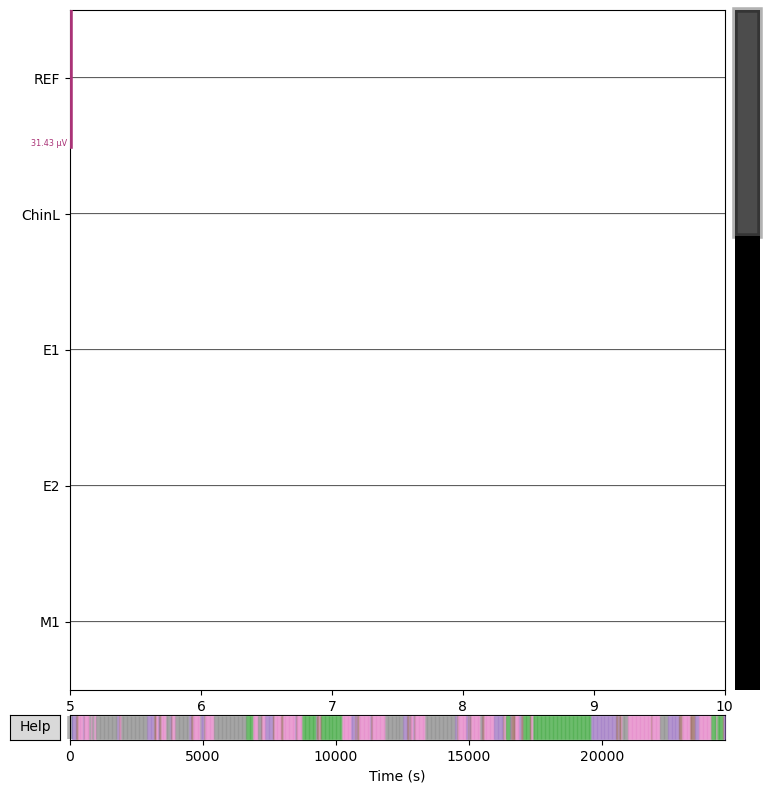

In [4]:
import mne

# Load the EEG file
eeg_file_path = '102_1.edf'  # Example file path
raw = mne.io.read_raw_edf(eeg_file_path, preload=True)

# Plot a segment of the EEG data
raw.plot(duration=5, start=5, scalings='auto', n_channels=5)

In [5]:
# Bandpass filter
raw.filter(l_freq=1.0, h_freq=40.0)

# Notch filter to remove power line noise at 50 Hz (or 60 Hz depending on your location)
raw.notch_filter(freqs=50)

# Prepare for ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.1s finished


Fitting ICA to data using 15 channels (please be patient, this may take a while)


ValueError: ica.n_components (20) cannot be greater than len(picks) (15)

In [6]:
events = mne.make_fixed_length_events(raw, duration=30)
epochs = mne.Epochs(raw, events, tmin=0., tmax=30., baseline=None, preload=True)

Not setting metadata
821 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 821 events and 15001 original time points ...
0 bad epochs dropped
